<a href="https://colab.research.google.com/github/prosto31/dap-2024/blob/main/les06/%D0%9B%D0%A06_%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D0%BA%D0%BE_12002208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6. Линейная регрессия

по дисциплине "Анализ данных на Python".<br>
студента очного отделения<br>
3 курса 12002209 группы<br>
Коваленко Денис Дмитриевич.
<br><br>
Проверил<br>
Чеботарев Сергей Александрович<br><br>

## Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

1. Выведете описание набора данных и наименование признаков.

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [ ]:
data_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [ ]:
print(data_df.dtypes)
data_df.isnull().sum()

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


Вывод: Категориальные признаки отсутствуют, так как все значения числовые. Присутствуют нулевые значения.

## Исследование данных

4. Постройте матрицу корреляции.

In [ ]:
data_df['target'] = diabetes.target
matrix = data_df.corr()
matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

Text(0, 0.5, 'target')

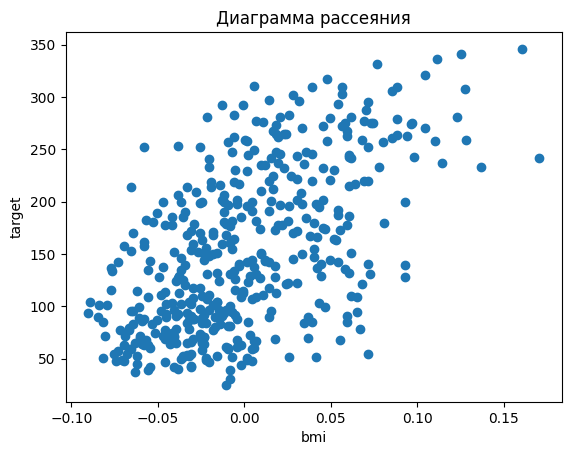

In [ ]:
maxcorr = matrix['target'].drop('target').idxmax()
plt.figure()
plt.scatter(data_df[maxcorr], data_df['target'])
plt.title(f"Диаграмма рассеяния")
plt.xlabel(maxcorr)
plt.ylabel('target')


6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [ ]:
maxf = matrix['target'].drop('target').abs().head(5).index
X = data_df[maxf]
y = data_df['target']
print("5 признаков с макс значением", maxf.tolist())
print("X", X.head())
print("y", y.head())

5 признаков с макс значением ['age', 'sex', 'bmi', 'bp', 's1']
X         age       sex       bmi        bp        s1
0  0.038076  0.050680  0.061696  0.021872 -0.044223
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449
2  0.085299  0.050680  0.044451 -0.005670 -0.045599
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191
4  0.005383 -0.044642 -0.036385  0.021872  0.003935
y 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Размер обучающего:(X,y))", X_train.shape, y_train.shape)
print("Размер тестового(X,y):", X_test.shape, y_test.shape)

Размер обучающего:(X,y)) (331, 5) (331,)
Размер тестового(X,y): (111, 5) (111,)


8. Выполните обучение модели.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  53.784557443405994


10. Расчитайте R² (коэффициент детерминации)

In [ ]:
print('R2 = ', np.sqrt(metrics.r2_score(y_test, y_pred)))

R2 =  0.6905535561330528


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?<i> Обучение с учителем (Supervised Learning): Используются размеченные данные (с входами и соответствующими выходами). Обучение без учителя (Unsupervised Learning): Работа с неразмеченными данными для выявления скрытых закономерностей (кластеризация, понижение размерности). Обучение с подкреплением (Reinforcement Learning): Обучение через взаимодействие с окружающей средой на основе вознаграждения и штрафов. Полуобучение (Semi-Supervised Learning): Комбинируются размеченные и неразмеченные данные. Обучение на основе переноса (Transfer Learning): Использование знаний из одной задачи для другой, похожей задачи.</i>
2. Чем отличается обучение с учителем и без учителя?<i> Обучение с учителем: Данные размечены, модель предсказывает определенный выход (классификация, регрессия). Обучение без учителя: Данные неразмечены, модель ищет скрытые структуры (кластеризация, PCA).</i>
3. Чем пакетное обучение отличается от динамического?<i> Пакетное обучение: Модель обучается на всех данных сразу. Требует полной доступности данных. Динамическое (онлайн) обучение: Данные поступают по одному или небольшими порциями, модель адаптируется постепенно. </i>
4. Чем обучение на основе образцов отличается от обучения на основе модели? <i>Обучение на основе образцов: Модель запоминает примеры из данных и делает предсказания, сравнивая с ними (например, kNN). Обучение на основе модели: Модель строит обобщенные зависимости между входами и выходами, используя параметры (например, линейная регрессия).</i>
5. Что такое линейная регрессия?<i>Линейная регрессия — используемая в статистике регрессионная модель зависимости одной переменной y от другой или нескольких других переменных x с линейной функцией зависимости.</i>
6. Что такое градиентный спуск?<i>Оптимизационный алгоритм, который минимизирует функцию ошибки путем итеративного обновления параметров модели по направлению антиградиента.</i>
7. Как правильно обрабатывать категориальные признаки?<i>Обработка категориальных признаков:Преобразование категорий в числа.Создание бинарных признаков для каждой категории.Используется, если категории имеют порядок.Заменяет категории на среднее значение целевой переменной.</i>
8. Что такое матрица корреляции?<i>Матрица, показывающая степень линейной зависимости между числовыми переменными. Коэффициенты корреляции варьируются от -1 до 1.</i>
9. Что показывает метрика RMSE?<i>Корень среднеквадратичной ошибки. Измеряет разницу между предсказанными и истинными значениями.</i>
10. Что показывает метрика R²?<i>Показывает долю объясненной моделью дисперсии в данных.</i>